In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [4]:
X_test.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


In [5]:
train.describe()

,id,B,C,H,K,N,O,P
count,552.000000,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000,552.000000
mean,276.500000,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087,0.552536
std,159.492947,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945,0.497683
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.750000,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000,0.000000
50%,276.500000,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000,1.000000
75%,414.250000,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000,1.000000
max,552.000000,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000,1.000000


In [6]:
import seaborn as sns

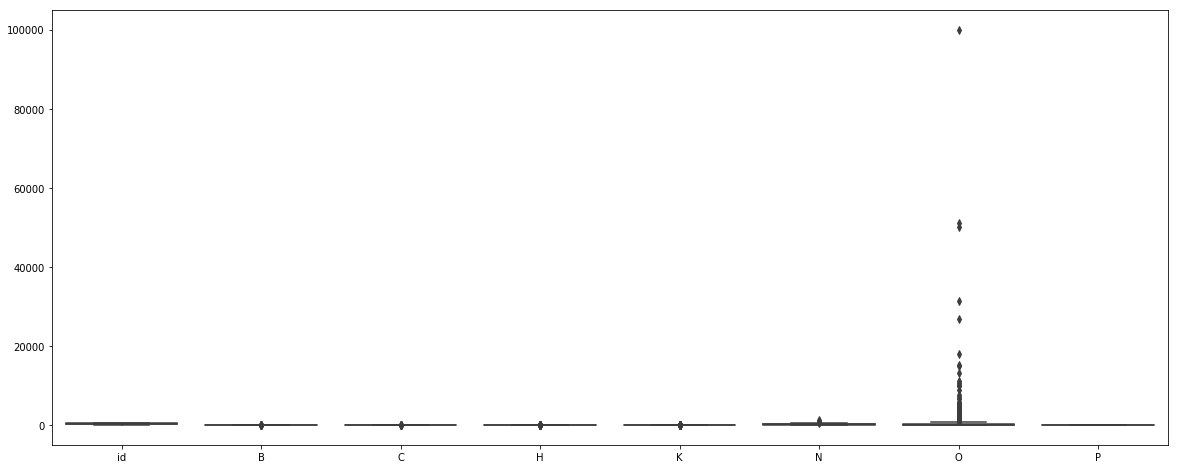

In [7]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=train, orient='v')

In [8]:
# Due to high range of values in O column, we can't visualize this boxplot accurately. So we need to normalize and then remove outliers.

In [9]:
from sklearn.preprocessing import StandardScaler

y_train = train[['P']]
X_train = train.drop(columns=['P'])
X_train.drop(columns = 'id', inplace = True)
X_test.drop(columns = 'id', inplace = True)

In [10]:
X_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375
1,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0
2,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179
3,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0
4,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456


In [11]:
train_initial_cols = list(X_train.columns)
X_train_numerical = X_train.select_dtypes(include=[np.number])
X_test_numerical = X_test.select_dtypes(include=[np.number])
X_train_numerical.head()

,B,C,H,K,N,O
0,18.42,10.415,0.125,0,120.0,375
1,21.75,11.750,0.250,0,180.0,0
2,30.17,1.085,0.040,0,170.0,179
3,22.67,2.540,2.585,0,0.0,0
4,36.00,1.000,2.000,11,0.0,456


In [12]:
X_train_numerical.describe()

,B,C,H,K,N,O
count,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000
mean,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087
std,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000
75%,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000
max,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000


In [13]:
X_train_numerical = X_train_numerical.fillna(X_train_numerical.mean())
X_test_numerical = X_test_numerical.fillna(X_test_numerical.mean())

In [14]:
scaler = StandardScaler()
scaler.fit(X_train_numerical)
train_scaled = scaler.fit_transform(X_train_numerical)
test_scaled = scaler.fit_transform(X_test_numerical)

In [15]:
X_train_numerical = pd.DataFrame(train_scaled, index = X_train_numerical.index, columns = X_train_numerical.columns)
X_test_numerical = pd.DataFrame(test_scaled, index = X_test_numerical.index, columns = X_test_numerical.columns)

In [16]:
X_train_numerical.head()

,B,C,H,K,N,O
0,-1.100231,1.142053,-0.620500,-0.540022,-0.360114,-0.123848
1,-0.817203,1.412626,-0.584157,-0.540022,0.031579,-0.189025
2,-0.101558,-0.748916,-0.645213,-0.540022,-0.033703,-0.157914
3,-0.739009,-0.454022,0.094732,-0.540022,-1.143501,-0.189025
4,0.393953,-0.766144,-0.075354,2.021708,-1.143501,-0.109770


In [17]:
X_test_numerical.head()

,B,C,H,K,N,O
0,-0.265281,-0.228548,0.484954,0.041425,0.478664,-0.424309
1,-0.334576,0.063693,3.046919,-0.409894,-0.650712,-0.424309
2,-0.258682,1.971049,1.011011,0.342305,-0.223381,-0.424309
3,0.972124,0.388080,1.808636,0.041425,-0.955949,-0.424309
4,-1.180136,0.161106,-0.539832,-0.409894,-0.607107,-0.424309


In [18]:
X_train.update(X_train_numerical)

In [19]:
X_test.update(X_test_numerical)

In [20]:
X_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,-1.100231,1.142053,y,p,aa,v,-0.620500,t,f,-0.540022,f,g,-0.360114,-0.123848
1,a,-0.817203,1.412626,u,g,c,v,-0.584157,f,f,-0.540022,t,g,0.031579,-0.189025
2,b,-0.101558,-0.748916,y,p,c,v,-0.645213,f,f,-0.540022,f,g,-0.033703,-0.157914
3,b,-0.739009,-0.454022,y,p,c,h,0.094732,t,f,-0.540022,f,g,-1.143501,-0.189025
4,a,0.393953,-0.766144,u,g,c,v,-0.075354,t,t,2.021708,f,g,-1.143501,-0.109770


In [21]:
X_test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,-0.265281,-0.228548,u,g,w,v,0.484954,t,t,0.041425,t,g,0.478664,-0.424309
1,b,-0.334576,0.063693,u,g,w,v,3.046919,t,f,-0.409894,t,g,-0.650712,-0.424309
2,b,-0.258682,1.971049,u,g,aa,v,1.011011,t,t,0.342305,t,g,-0.223381,-0.424309
3,a,0.972124,0.388080,u,g,q,v,1.808636,t,t,0.041425,t,g,-0.955949,-0.424309
4,b,-1.180136,0.161106,u,g,k,v,-0.539832,t,f,-0.409894,f,g,-0.607107,-0.424309


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 15 columns):
A    544 non-null object
B    552 non-null float64
C    552 non-null float64
D    547 non-null object
E    547 non-null object
F    545 non-null object
G    545 non-null object
H    552 non-null float64
I    552 non-null object
J    552 non-null object
K    552 non-null float64
L    552 non-null object
M    552 non-null object
N    552 non-null float64
O    552 non-null float64
dtypes: float64(6), object(9)
memory usage: 64.8+ KB


In [23]:
category_columns = X_train.select_dtypes(include=['object'])
for column in list(category_columns.columns):
    X_train[column] = X_train[column].astype('category')
    X_test[column] = X_test[column].astype('category')
    print(column,':')
    print('------')
    d = X_train[column].value_counts()
    for key,value in d.items():
        print(key, value)
    print()

A :
------
b 374
a 170

D :
------
u 416
y 129
l 2

E :
------
g 416
p 129
gg 2

F :
------
c 115
q 66
w 50
i 47
ff 43
aa 42
k 40
x 31
m 31
cc 29
d 24
e 18
j 8
r 1

G :
------
v 319
h 113
bb 47
ff 46
z 7
j 6
dd 3
o 2
n 2

I :
------
t 286
f 266

J :
------
f 319
t 233

L :
------
f 298
t 254

M :
------
g 497
s 48
p 7



In [24]:
for column in list(category_columns):
    print(column,':')
    print('------')
    d = X_test[column].value_counts()
    for key,value in d.items():
        print(key, value)
    print()

A :
------
b 94
a 40

D :
------
u 103
y 34

E :
------
g 103
p 34

F :
------
c 22
w 14
q 12
i 12
cc 12
aa 12
k 11
ff 10
x 7
m 7
e 7
d 6
r 2
j 2

G :
------
v 80
h 25
bb 12
ff 11
dd 3
n 2
j 2
z 1

I :
------
t 75
f 63

J :
------
f 76
t 62

L :
------
f 76
t 62

M :
------
g 128
s 9
p 1



In [25]:
# In column A, fill missing with categorical variable 'b'
# In column D, fill missing with categorical variable 'u'
# In column E, fill missing with categorical variable 'g'
# In column F, fill missing with categorical variable 'c'
# In column G, fill missing with categorical variable 'v'

X_train['A'] = X_train['A'].fillna('b')
X_train['D'] = X_train['D'].fillna('u')
X_train['E'] = X_train['E'].fillna('g')
X_train['F'] = X_train['F'].fillna('c')
X_train['G'] = X_train['G'].fillna('v')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 15 columns):
A    552 non-null category
B    552 non-null float64
C    552 non-null float64
D    552 non-null category
E    552 non-null category
F    552 non-null category
G    552 non-null category
H    552 non-null float64
I    552 non-null category
J    552 non-null category
K    552 non-null float64
L    552 non-null category
M    552 non-null category
N    552 non-null float64
O    552 non-null float64
dtypes: category(9), float64(6)
memory usage: 32.6 KB


In [26]:
category_columns = list(X_train.select_dtypes(include=['category']).columns)
category_columns

['A', 'D', 'E', 'F', 'G', 'I', 'J', 'L', 'M']

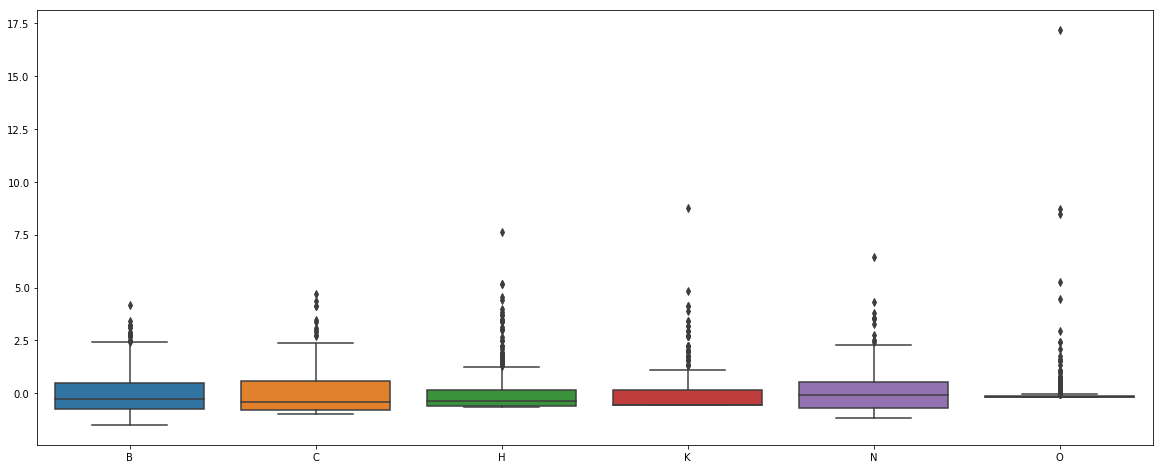

In [27]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=X_train, orient='v')

### Outlier removal

In [28]:
outliers = []
for col in list(X_train.columns):
    if X_train[col].dtype.name != 'category':
        Q1 = np.percentile(X_train[col], 25)
        Q3 = np.percentile(X_train[col], 75)
        step = 1.5*(Q3-Q1)
        temp = X_train[~((X_train[col] >= Q1 - step) & (X_train[col] <= Q3 + step))]
        outliers.append(list(temp.index))
        print(col)
        print(temp.index)
        print()
common_outliers = set([])
common_outliers.update(outliers[0])
for i in range(1, len(outliers)):
    common_outliers.intersection(outliers[i])

common_outliers = list(common_outliers)

B
Int64Index([32, 44, 45, 85, 90, 104, 161, 172, 174, 306, 364, 403, 406, 449,
            460],
           dtype='int64')

C
Int64Index([94, 104, 128, 187, 270, 320, 367, 368, 375, 388, 466], dtype='int64')

H
Int64Index([  9,  17,  32,  44,  64,  72, 104, 113, 115, 116, 126, 134, 137,
            139, 142, 145, 147, 174, 193, 219, 227, 242, 244, 258, 261, 270,
            286, 297, 306, 320, 339, 346, 348, 354, 368, 375, 393, 400, 431,
            451, 454, 476, 493, 519, 525],
           dtype='int64')

K
Int64Index([  4,   8,  12,  19,  31,  55,  61,  66,  84,  85, 104, 109, 119,
            129, 134, 136, 139, 142, 153, 229, 235, 237, 239, 241, 258, 260,
            267, 270, 294, 297, 298, 300, 306, 310, 320, 339, 348, 364, 368,
            371, 375, 379, 397, 409, 412, 422, 424, 440, 441, 442, 454, 471,
            478, 484, 489, 501, 518, 533, 534, 536, 541, 547],
           dtype='int64')

N
Int64Index([125, 152, 181, 187, 224, 291, 311, 332, 374, 448], dtype='int64')

O
Int64

In [29]:
X_train = X_train.drop(X_train.index[common_outliers]).reset_index(drop = True)
y_train = y_train.drop(y_train.index[common_outliers]).reset_index(drop = True)

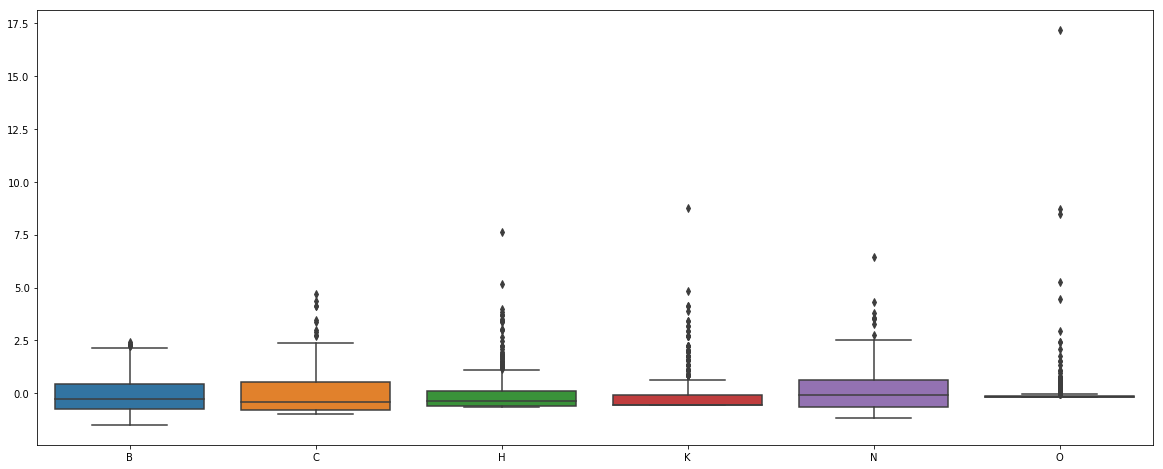

In [30]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=X_train, orient='v')

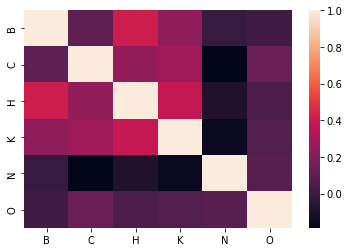

In [31]:
sns.heatmap(X_train.corr())

In [32]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [33]:
X_train.head()

,B,C,H,K,N,O,A_a,A_b,D_l,D_u,...,G_z,I_f,I_t,J_f,J_t,L_f,L_t,M_g,M_p,M_s
0,-1.100231,1.142053,-0.620500,-0.540022,-0.360114,-0.123848,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
1,-0.817203,1.412626,-0.584157,-0.540022,0.031579,-0.189025,1,0,0,1,...,0,1,0,1,0,0,1,1,0,0
2,-0.101558,-0.748916,-0.645213,-0.540022,-0.033703,-0.157914,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
3,-0.739009,-0.454022,0.094732,-0.540022,-1.143501,-0.189025,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
4,0.393953,-0.766144,-0.075354,2.021708,-1.143501,-0.109770,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0


In [34]:
X_test.head()

,B,C,H,K,N,O,A_a,A_b,D_u,D_y,...,G_z,I_f,I_t,J_f,J_t,L_f,L_t,M_g,M_p,M_s
0,-0.265281,-0.228548,0.484954,0.041425,0.478664,-0.424309,0,1,1,0,...,0,0,1,0,1,0,1,1,0,0
1,-0.334576,0.063693,3.046919,-0.409894,-0.650712,-0.424309,0,1,1,0,...,0,0,1,1,0,0,1,1,0,0
2,-0.258682,1.971049,1.011011,0.342305,-0.223381,-0.424309,0,1,1,0,...,0,0,1,0,1,0,1,1,0,0
3,0.972124,0.388080,1.808636,0.041425,-0.955949,-0.424309,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,-1.180136,0.161106,-0.539832,-0.409894,-0.607107,-0.424309,0,1,1,0,...,0,0,1,1,0,1,0,1,0,0


In [35]:
del_cols = []
for col in list(set(X_train.columns) - set(train_initial_cols)):
    if X_train[col].sum() <= 20:
        del_cols.append(col)
print(del_cols)

['E_gg', 'F_j', 'F_e', 'G_n', 'G_o', 'M_p', 'G_j', 'D_l', 'G_dd', 'F_r', 'G_z']


In [36]:
for col in del_cols:
    if col in list(X_train.columns):
        X_train.drop(columns = col, inplace = True)
    if col in list(X_test.columns):
        X_test.drop(columns = col, inplace = True)

In [37]:
X_train.head()

,B,C,H,K,N,O,A_a,A_b,D_u,D_y,...,G_h,G_v,I_f,I_t,J_f,J_t,L_f,L_t,M_g,M_s
0,-1.100231,1.142053,-0.620500,-0.540022,-0.360114,-0.123848,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
1,-0.817203,1.412626,-0.584157,-0.540022,0.031579,-0.189025,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0
2,-0.101558,-0.748916,-0.645213,-0.540022,-0.033703,-0.157914,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
3,-0.739009,-0.454022,0.094732,-0.540022,-1.143501,-0.189025,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
4,0.393953,-0.766144,-0.075354,2.021708,-1.143501,-0.109770,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0


In [38]:
X_test.head()

,B,C,H,K,N,O,A_a,A_b,D_u,D_y,...,G_h,G_v,I_f,I_t,J_f,J_t,L_f,L_t,M_g,M_s
0,-0.265281,-0.228548,0.484954,0.041425,0.478664,-0.424309,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
1,-0.334576,0.063693,3.046919,-0.409894,-0.650712,-0.424309,0,1,1,0,...,0,1,0,1,1,0,0,1,1,0
2,-0.258682,1.971049,1.011011,0.342305,-0.223381,-0.424309,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
3,0.972124,0.388080,1.808636,0.041425,-0.955949,-0.424309,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
4,-1.180136,0.161106,-0.539832,-0.409894,-0.607107,-0.424309,0,1,1,0,...,0,1,0,1,1,0,1,0,1,0


In [39]:
list(set(X_train.columns) - set(X_test.columns))

[]

In [40]:
# So same columns in both train and test sets

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

/home/suryavamsi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
pred = clf.predict(X_test)
pred_svc = clf_svc.predict(X_test)

In [43]:
print(X_test.shape, len(pred))

(138, 35) 138


In [44]:
output = pd.DataFrame()
output_svc = pd.DataFrame()
X_test = pd.read_csv('test.csv')
output['id'] = X_test['id']
output['P'] = pred
output_svc['id'] = X_test['id']
output_svc['P'] = pred_svc
output.head()

,id,P
0,553,0
1,554,0
2,555,0
3,556,0
4,557,0


In [45]:
output.to_csv('output.csv', index = False)
output_svc.to_csv('output_svc.csv', index = False)

### score: 84.73 --v1.0